# Proyecto para la matería de minería de datos FI UNAM 2022-2

## Equipo 11

## IMPORTAR LAS BIBLIOTECAS Y LOS DATASETS

In [1]:
#Se importan las bibliotecas correspondientes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#Se define la ruta del dataset
path="../Data-files/DataSet.csv"
data_bank_df = pd.read_csv(path)

In [3]:
#Revisamos la carga correcta de los datos
data_bank_df

,NUM_SOLICITUD,SUCURSAL,STATUS_SOLICITUD,PUNTO_DECISION,APROBACION_TC,TIPO_CTE,LINEA_CREDITO_FINAL,CUENTA_ASIGNADA,MESES_VENCIDOS,SALDO_CUENTA,...,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,PEOR_HISTORIA_CREDITO,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD,TIPO_VIVIENDA,ESCOLARIDAD
0,2.010000e+16,4357,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Renta,Preparatoria
1,2.010000e+16,164,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Familiares,Licenciatura
2,2.010000e+16,306,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Familiares,Preparatoria
3,2.010000e+16,951,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,1,1665,450,0,0,0,25,Renta,Posgrado
4,2.010000e+16,522,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,1,30397,1830,0,17050,0,25,Renta,Licenciatura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,2.010000e+16,147,Aprobada,CN0,Aprobado,BUENO,49999,9.980000e+14,1.0,"55,999",...,708,0,0,0,0,0,0,60,Propia,Posgrado
4196,2.010000e+16,4779,Aprobada,CN0,Aprobado,BUENO,45000,9.980000e+14,2.0,"29,700",...,734,0,0,0,0,0,0,60,Familiares,Preparatoria
4197,2.010000e+16,4384,Aprobada,CN0,Aprobado,BUENO,50000,9.980000e+14,1.0,"29,500",...,761,0,0,0,0,0,0,60,Renta,Preparatoria
4198,2.010000e+16,28,Aprobada,CN0,Aprobado,REGULAR,4999,9.980000e+14,1.0,"1,850",...,783,0,0,0,0,0,0,60,Renta,Preparatoria


In [4]:
#Eliminamos columnas inecesarias, se realizó una revisión previa para descartar estas columnas
data_bank_df.drop(["NUM_SOLICITUD", "SUCURSAL", "PUNTO_DECISION", "CUENTA_ASIGNADA","STATUS_SOLICITUD","SEGMENTO_CLIENTE","MESES_VENCIDOS","CAPACIDAD_PAGO_TOTAL"], axis = 1, inplace = True)
data_bank_df.drop(["CAPACIDAD_TC","SALDO_CUENTA","PEOR_HISTORIA_CREDITO"], axis = 1, inplace = True)

In [5]:
#Revisamos los tipos de datos que tenemos, por si es necesario modificar algunos
data_bank_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   APROBACION_TC            4200 non-null   object
 1   TIPO_CTE                 4200 non-null   object
 2   LINEA_CREDITO_FINAL      4200 non-null   int64 
 3   INGRESO_INFERIDO         4200 non-null   int64 
 4   COMPROBANTE_INGRESOS     4200 non-null   object
 5   CLIENTE_CDE              4200 non-null   object
 6   SUMA_LINEAS_REVOLVENTES  4200 non-null   int64 
 7   NIVEL_RIESGO             4200 non-null   object
 8   SOLICITUDES_RECHAZADAS   4200 non-null   int64 
 9   SCORE_CLIENTE            4200 non-null   int64 
 10  SCORE_COMPORTAMIENTO     4200 non-null   int64 
 11  PEOR_MOP_TARJETAS        4200 non-null   int64 
 12  SUMA_SALDOS_TARJETAS     4200 non-null   int64 
 13  SUMA_PAGO_MIN_TARJETAS   4200 non-null   int64 
 14  SUMA_SALDOS_TOTAL        4200 non-null  

In [6]:
#Obtenemos algunos estadísticos de los datos
data_bank_df.describe()

,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,9941.035952,43081.393571,9821.183810,2.026905,136.223333,223.941905,0.264524,3721.347381,357.659762,7690.722381,0.002143,42.615238
std,29516.629026,25502.797773,34077.208942,1.798888,60.292299,338.787351,0.897340,13375.637563,2963.271226,34243.413431,0.051138,10.330894
min,0.000000,4500.000000,0.000000,0.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,0.000000,21783.750000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,0.000000,35906.500000,0.000000,2.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
75%,6000.000000,60109.000000,0.000000,4.000000,205.000000,706.000000,0.000000,218.500000,0.000000,0.000000,0.000000,52.000000
max,687000.000000,119261.000000,680500.000000,5.000000,297.000000,805.000000,19.000000,210437.000000,95758.000000,717380.000000,2.000000,60.000000


# Visualizar datos

In [7]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 
data_bank_df.duplicated().sum()

0

In [8]:
#Revisamos si existen datos faltantes
data_bank_df.isnull().sum()

APROBACION_TC              0
TIPO_CTE                   0
LINEA_CREDITO_FINAL        0
INGRESO_INFERIDO           0
COMPROBANTE_INGRESOS       0
CLIENTE_CDE                0
SUMA_LINEAS_REVOLVENTES    0
NIVEL_RIESGO               0
SOLICITUDES_RECHAZADAS     0
SCORE_CLIENTE              0
SCORE_COMPORTAMIENTO       0
PEOR_MOP_TARJETAS          0
SUMA_SALDOS_TARJETAS       0
SUMA_PAGO_MIN_TARJETAS     0
SUMA_SALDOS_TOTAL          0
NUM_CREDITOS               0
EDAD                       0
TIPO_VIVIENDA              0
ESCOLARIDAD                0
dtype: int64

In [9]:
#Se modifica el valor de las siguientes columnas
#APROBACIÓN TC: Se dejará sólo en Aprobado y rechazado, ya que Pre-aprobado no contiene datos relevantes, esta categoría se cambiará a rechazado 

In [10]:
print(data_bank_df.loc[(data_bank_df['APROBACION_TC'] == "Pre-Aprobado"), 'APROBACION_TC'].shape)
data_bank_df.loc[(data_bank_df['APROBACION_TC'] == "Pre-Aprobado"), 'APROBACION_TC']="Rechazado"
print(data_bank_df.loc[(data_bank_df['APROBACION_TC'] == "Pre-Aprobado"), 'APROBACION_TC'].shape)

(207,)
(0,)


In [11]:
data_bank_df.describe()

,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,9941.035952,43081.393571,9821.183810,2.026905,136.223333,223.941905,0.264524,3721.347381,357.659762,7690.722381,0.002143,42.615238
std,29516.629026,25502.797773,34077.208942,1.798888,60.292299,338.787351,0.897340,13375.637563,2963.271226,34243.413431,0.051138,10.330894
min,0.000000,4500.000000,0.000000,0.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,0.000000,21783.750000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,0.000000,35906.500000,0.000000,2.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
75%,6000.000000,60109.000000,0.000000,4.000000,205.000000,706.000000,0.000000,218.500000,0.000000,0.000000,0.000000,52.000000
max,687000.000000,119261.000000,680500.000000,5.000000,297.000000,805.000000,19.000000,210437.000000,95758.000000,717380.000000,2.000000,60.000000


In [12]:
#data_bank_df.to_csv("datos_limpios_aprobacion_cat.csv")

# Visualización

In [13]:
# Reemplazamos la columna APROBACION_TC por enteros antes de poder llevar a cabo cualquier visualización
data_bank_df['APROBACION_TC'] = data_bank_df['APROBACION_TC'].apply(lambda x: 1 if x == 'Aprobado' else 0)

In [14]:
data_bank_df.head(1)

,APROBACION_TC,TIPO_CTE,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,COMPROBANTE_INGRESOS,CLIENTE_CDE,SUMA_LINEAS_REVOLVENTES,NIVEL_RIESGO,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD,TIPO_VIVIENDA,ESCOLARIDAD
0,0,MALO,0,4500,RECIBOS DE NOMINA,NO_CLIENTE,0,Alto,5,89,0,0,0,0,0,0,25,Renta,Preparatoria


Debibo a la visualización de un crédito muy alto, se decide realizar un boxplot para ver las líneas de crédito

<AxesSubplot:xlabel='LINEA_CREDITO_FINAL', ylabel='ESCOLARIDAD'>

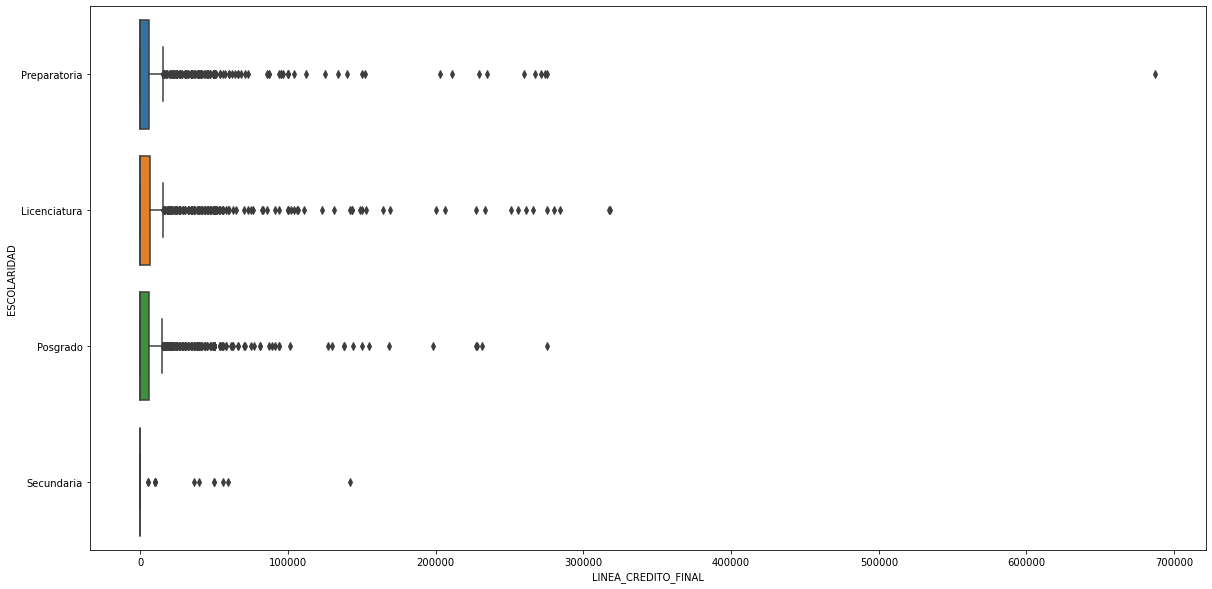

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'LINEA_CREDITO_FINAL', y = 'ESCOLARIDAD', data = data_bank_df)

Se toma la decisión de eliminar del dataset al usuario con un crédito de más de $600,000 por ser un outlier

In [16]:
data_bank_df[data_bank_df["LINEA_CREDITO_FINAL"] > 600000]

,APROBACION_TC,TIPO_CTE,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,COMPROBANTE_INGRESOS,CLIENTE_CDE,SUMA_LINEAS_REVOLVENTES,NIVEL_RIESGO,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD,TIPO_VIVIENDA,ESCOLARIDAD
669,1,REGULAR,687000,22047,PAGOS PROV SEMESTRALES PFAE,NO_CLIENTE,0,Mínimo,0,242,780,0,0,0,0,0,30,Familiares,Preparatoria


In [17]:
data_bank_df.drop(data_bank_df.index[[669]], axis = 0, inplace = True)
data_bank_df[data_bank_df["LINEA_CREDITO_FINAL"] > 600000]

,APROBACION_TC,TIPO_CTE,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,COMPROBANTE_INGRESOS,CLIENTE_CDE,SUMA_LINEAS_REVOLVENTES,NIVEL_RIESGO,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD,TIPO_VIVIENDA,ESCOLARIDAD


In [18]:
#data_bank_df.to_csv("datos_limpios_aprobacion_num.csv")

array([[<AxesSubplot:title={'center':'APROBACION_TC'}>,
        <AxesSubplot:title={'center':'LINEA_CREDITO_FINAL'}>,
        <AxesSubplot:title={'center':'INGRESO_INFERIDO'}>,
        <AxesSubplot:title={'center':'SUMA_LINEAS_REVOLVENTES'}>],
       [<AxesSubplot:title={'center':'SOLICITUDES_RECHAZADAS'}>,
        <AxesSubplot:title={'center':'SCORE_CLIENTE'}>,
        <AxesSubplot:title={'center':'SCORE_COMPORTAMIENTO'}>,
        <AxesSubplot:title={'center':'PEOR_MOP_TARJETAS'}>],
       [<AxesSubplot:title={'center':'SUMA_SALDOS_TARJETAS'}>,
        <AxesSubplot:title={'center':'SUMA_PAGO_MIN_TARJETAS'}>,
        <AxesSubplot:title={'center':'SUMA_SALDOS_TOTAL'}>,
        <AxesSubplot:title={'center':'NUM_CREDITOS'}>],
       [<AxesSubplot:title={'center':'EDAD'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

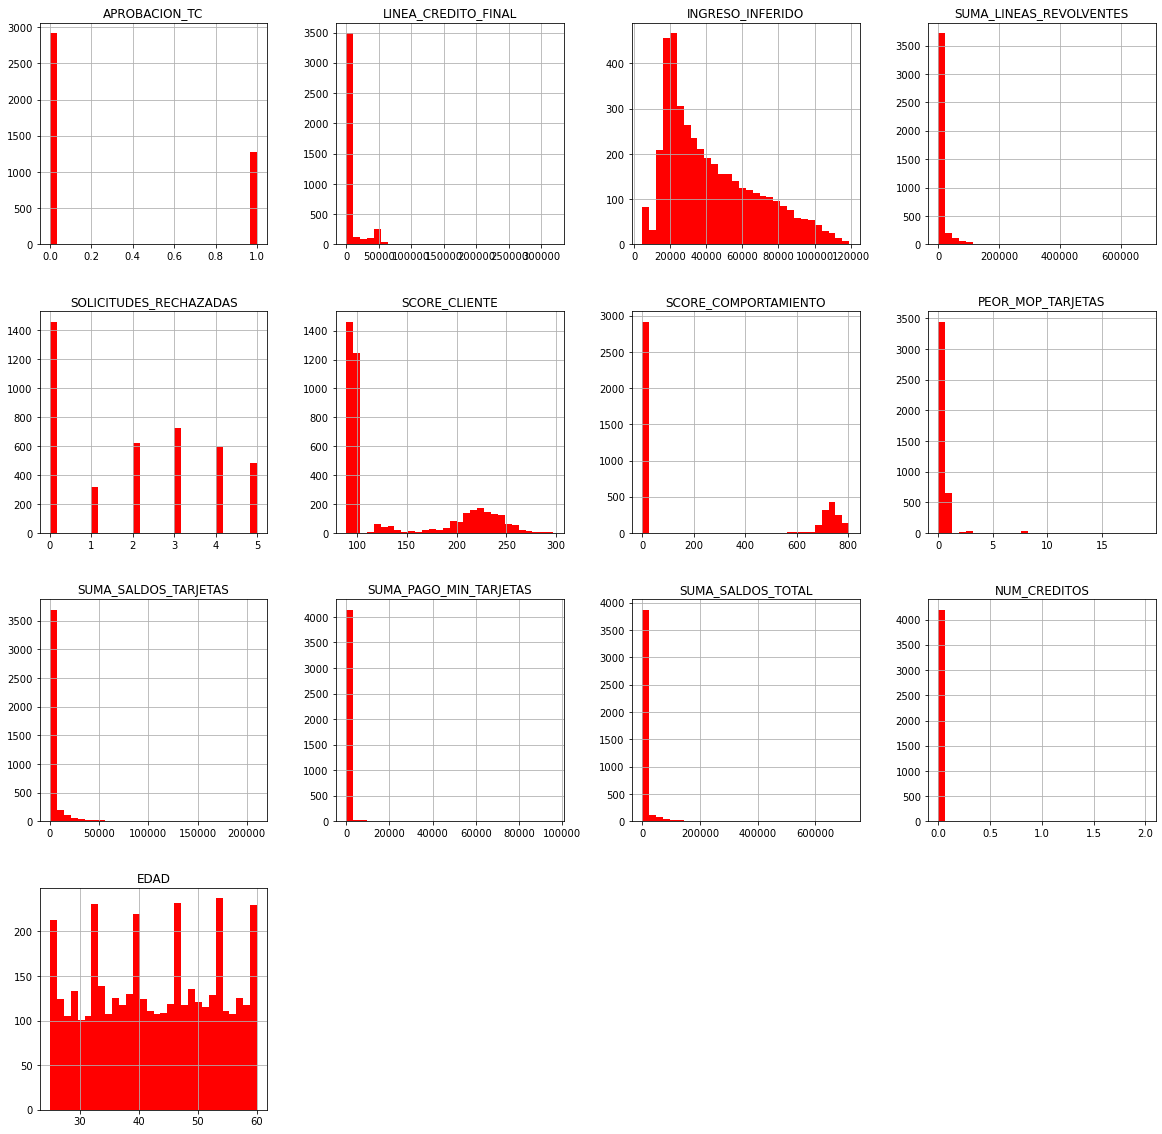

In [19]:
data_bank_df.hist(bins = 30, figsize=(20,20), color = 'r')

In [20]:
#Veamos cuántas personas tienen un crédito aceptado y cuántas un crédito rechazado
aprobado_df   = data_bank_df[data_bank_df['APROBACION_TC'] == 1]
rechazado_df  = data_bank_df[data_bank_df['APROBACION_TC'] == 0]

#aprobado_df.to_csv("datos_rechazado.csv")
#rechazado_df.to_csv("datos_aprobado.csv")

In [21]:
# Contamos el número de créditos aceptados y rechazados

print("Total de créditos solicitados = ", len(data_bank_df))

print("Número de créditos rechazados = ", len(rechazado_df))
print("Porcentaje de  créditos rechazados = ", 1.*len(rechazado_df)/len(data_bank_df)*100.0, "%")

print("Número de créditos aprobados = ", len(aprobado_df))
print("Porcentaje de créditos aprobados = ", 1.*len(aprobado_df)/len(data_bank_df)*100.0, "%")

Total de créditos solicitados =  4199
Número de créditos rechazados =  2919
Porcentaje de  créditos rechazados =  69.5165515598952 %
Número de créditos aprobados =  1280
Porcentaje de créditos aprobados =  30.483448440104787 %


Comparando los estadísticos

In [22]:
aprobado_df.describe()

,APROBACION_TC,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD
count,1280.0,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,1.0,32082.143750,44566.324219,23286.653906,0.030469,224.227344,734.200000,0.366406,5380.611719,258.854688,11090.385156,0.003906,42.778906
std,0.0,42257.775649,26365.073694,46004.965431,0.223365,22.479612,39.405639,0.648059,13814.126532,835.696718,40176.978033,0.073877,10.414867
min,1.0,1.000000,7500.000000,0.000000,0.000000,132.000000,450.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,1.0,9874.250000,22440.500000,0.000000,0.000000,211.000000,714.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,1.0,15250.000000,36387.500000,5000.000000,0.000000,224.000000,739.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000
75%,1.0,49999.000000,63109.250000,28000.000000,0.000000,240.000000,757.250000,1.000000,4384.500000,250.000000,0.000000,0.000000,52.000000
max,1.0,318000.000000,119261.000000,663000.000000,3.000000,297.000000,805.000000,8.000000,138509.000000,17880.000000,448630.000000,2.000000,60.000000


In [23]:
rechazado_df.describe()

,APROBACION_TC,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD
count,2919.0,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.0,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,0.0,0.070915,42437.448099,3919.854402,2.903049,97.596780,0.0,0.219938,2995.024323,401.108941,6202.583419,0.001370,42.547790
std,0.0,0.256726,25093.853023,25079.213348,1.455010,10.764639,0.0,0.983900,13117.331358,3510.482968,31185.890274,0.036999,10.293984
min,0.0,0.000000,4500.000000,0.000000,0.000000,89.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,0.0,0.000000,21608.000000,0.000000,2.000000,92.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,0.0,0.000000,35763.000000,0.000000,3.000000,95.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
75%,0.0,0.000000,59127.000000,0.000000,4.000000,99.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
max,0.0,1.000000,115783.000000,680500.000000,5.000000,187.000000,0.0,19.000000,210437.000000,95758.000000,717380.000000,1.000000,60.000000


Análisis de los estadísticos: 

<AxesSubplot:>

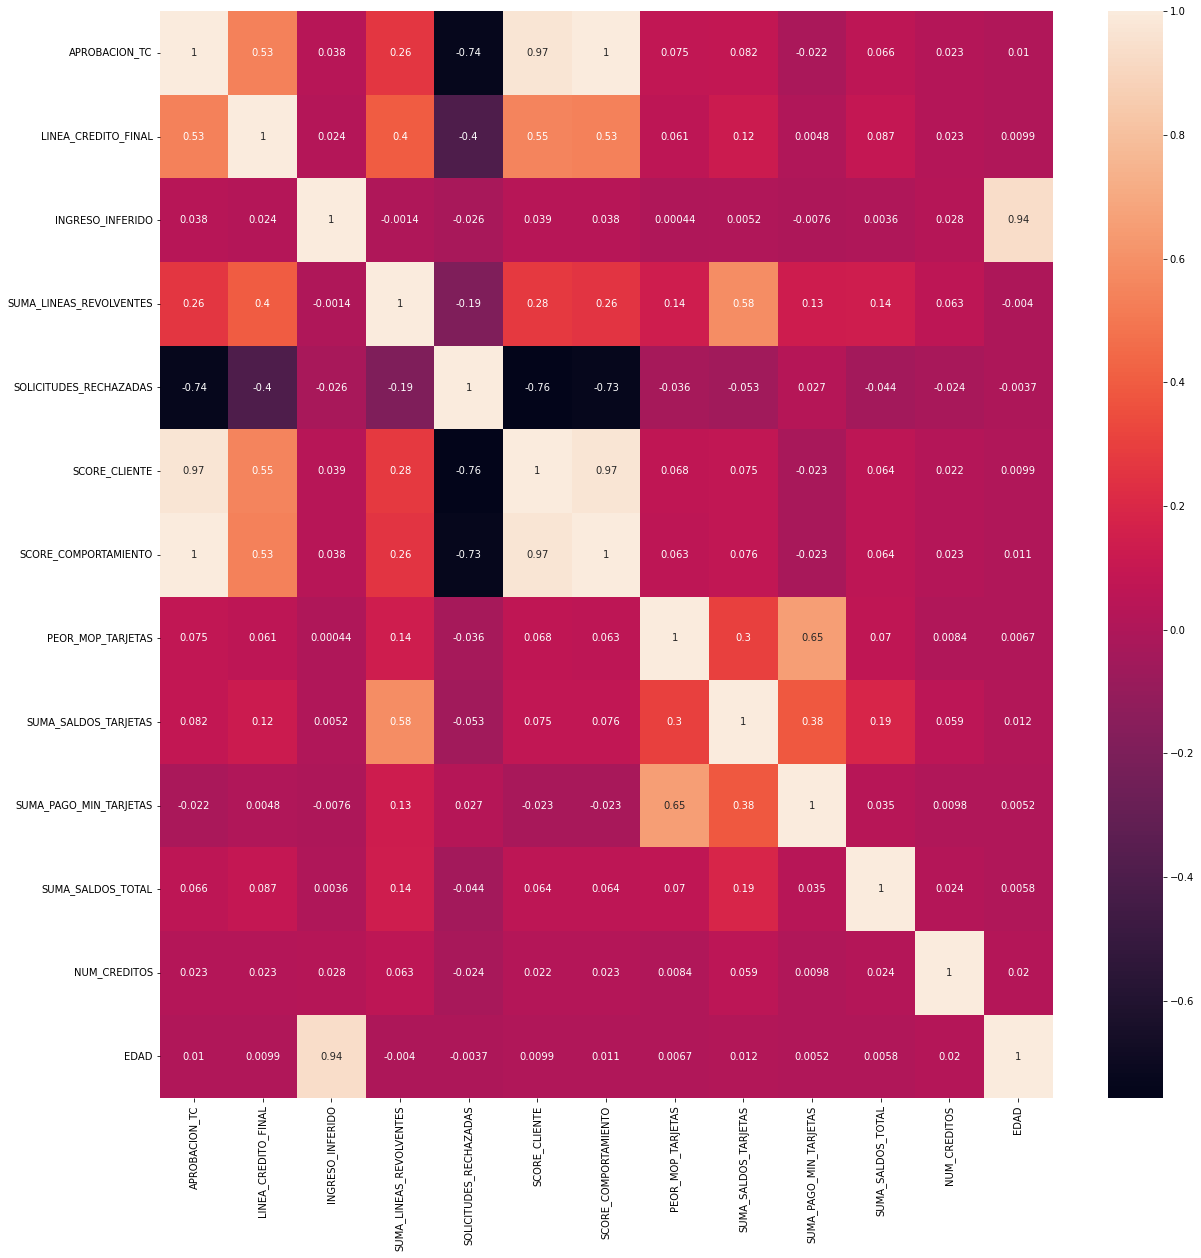

In [24]:
correlations = data_bank_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)

<AxesSubplot:xlabel='ESCOLARIDAD', ylabel='count'>

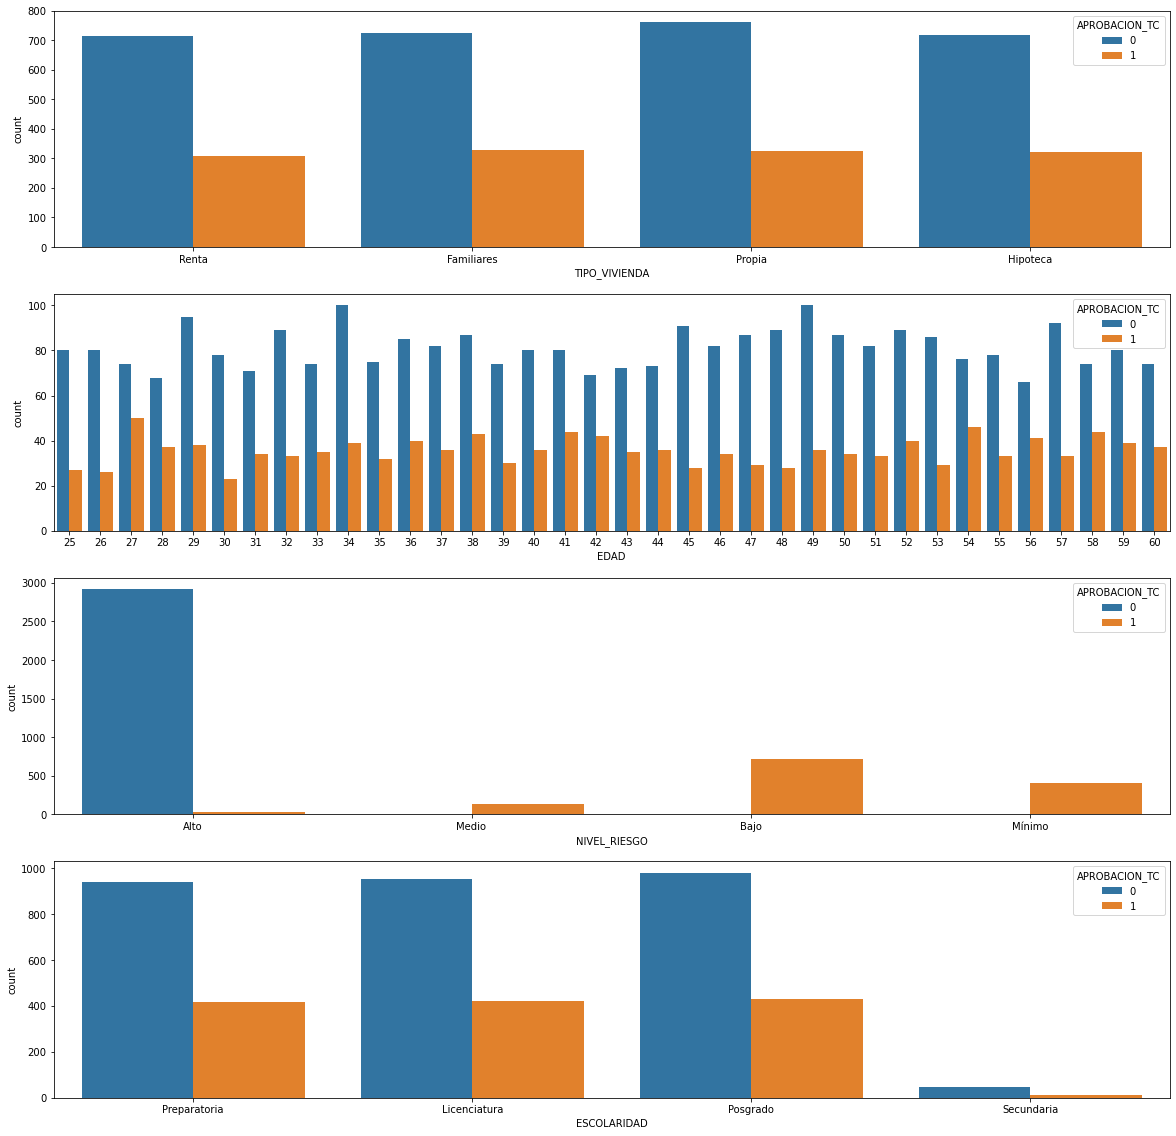

In [25]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'TIPO_VIVIENDA', hue = 'APROBACION_TC', data = data_bank_df)
plt.subplot(412)
sns.countplot(x = 'EDAD', hue = 'APROBACION_TC', data = data_bank_df)
plt.subplot(413)
sns.countplot(x = 'NIVEL_RIESGO', hue = 'APROBACION_TC', data = data_bank_df)
plt.subplot(414)
sns.countplot(x = 'ESCOLARIDAD', hue = 'APROBACION_TC', data = data_bank_df)

Text(0.5, 0, 'EDAD')

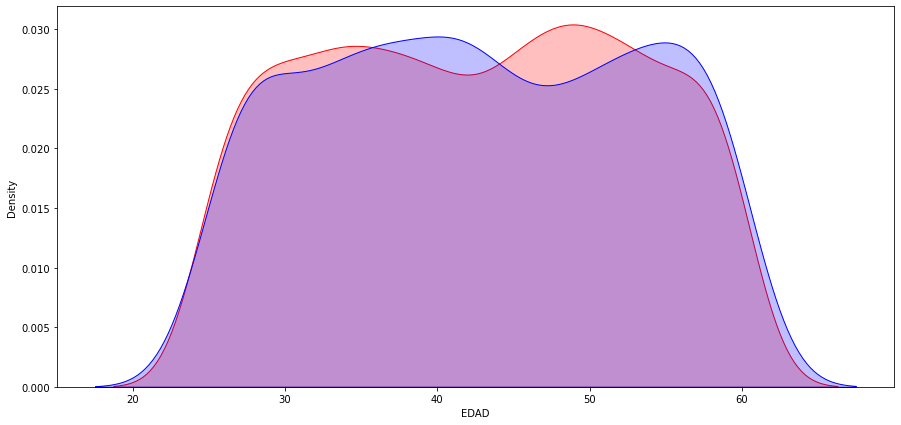

In [26]:
plt.figure(figsize=(15, 7))

sns.kdeplot(rechazado_df['EDAD'], legend = "Crédito rechazado", shade = True, color = 'r')
sns.kdeplot(aprobado_df['EDAD'], legend  = "Crédito aprobado", shade = True, color = 'b')


plt.xlabel('EDAD')

<AxesSubplot:xlabel='APROBACION_TC', ylabel='ESCOLARIDAD'>

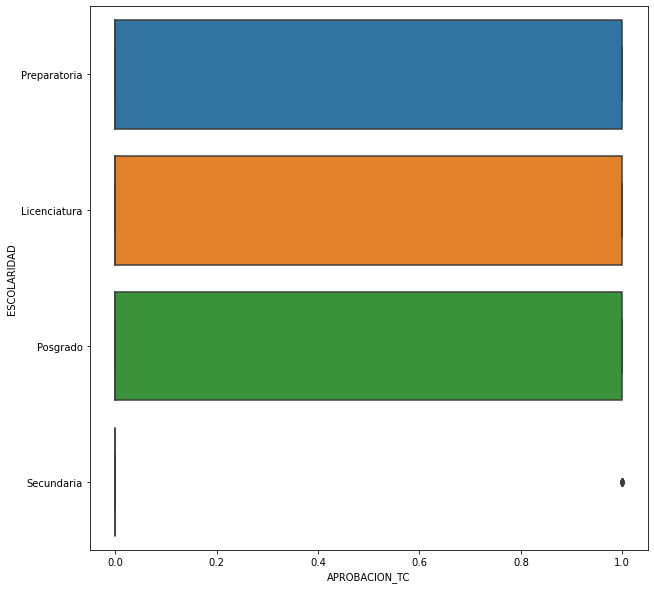

In [27]:

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'APROBACION_TC', y = 'ESCOLARIDAD', data = data_bank_df)

# Crear los data sets de entrenamiento y testing, llevar acabo la limpieza de datos

In [28]:
#Vamos a convertir los datos categóricos a numéricos

In [29]:
data_bank_df.columns

Index(['APROBACION_TC', 'TIPO_CTE', 'LINEA_CREDITO_FINAL', 'INGRESO_INFERIDO',
       'COMPROBANTE_INGRESOS', 'CLIENTE_CDE', 'SUMA_LINEAS_REVOLVENTES',
       'NIVEL_RIESGO', 'SOLICITUDES_RECHAZADAS', 'SCORE_CLIENTE',
       'SCORE_COMPORTAMIENTO', 'PEOR_MOP_TARJETAS', 'SUMA_SALDOS_TARJETAS',
       'SUMA_PAGO_MIN_TARJETAS', 'SUMA_SALDOS_TOTAL', 'NUM_CREDITOS', 'EDAD',
       'TIPO_VIVIENDA', 'ESCOLARIDAD'],
      dtype='object')

In [30]:
datos_cat=data_bank_df[["TIPO_CTE","COMPROBANTE_INGRESOS","CLIENTE_CDE","NIVEL_RIESGO","TIPO_VIVIENDA","ESCOLARIDAD"]]

In [31]:
datos_cat

,TIPO_CTE,COMPROBANTE_INGRESOS,CLIENTE_CDE,NIVEL_RIESGO,TIPO_VIVIENDA,ESCOLARIDAD
0,MALO,RECIBOS DE NOMINA,NO_CLIENTE,Alto,Renta,Preparatoria
1,MALO,RECIBOS DE NOMINA,NO_CLIENTE,Alto,Familiares,Licenciatura
2,MALO,RECIBOS DE NOMINA,NO_CLIENTE,Alto,Familiares,Preparatoria
3,MALO,RECIBOS DE NOMINA,NO_CLIENTE,Alto,Renta,Posgrado
4,MALO,RECIBOS DE NOMINA,NO_CLIENTE,Alto,Renta,Licenciatura
...,...,...,...,...,...,...
4195,BUENO,PROPIEDAD ACTIVO FIJO,CLIENTE_BANCO,Bajo,Propia,Posgrado
4196,BUENO,RECIBOS DE NOMINA,CLIENTE_BANCO,Bajo,Familiares,Preparatoria
4197,BUENO,RECIBOS DE NOMINA,CLIENTE_BANCO,Mínimo,Renta,Preparatoria
4198,REGULAR,RECIBOS DE NOMINA,CLIENTE_BANCO,Mínimo,Renta,Preparatoria


# ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA

In [32]:

onehotencoder = OneHotEncoder()

In [33]:
datos_transformados = onehotencoder.fit_transform(datos_cat).toarray()
datos_transformados.shape

(4199, 24)

In [34]:
datos_transformados_df = pd.DataFrame(datos_transformados)
datos_transformados_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4197,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
#Ahora hacemos un df con los datos numéricos y excluimos APROBACION_TC, ya que es la variable objetivo

In [36]:
data_bank_df.columns

Index(['APROBACION_TC', 'TIPO_CTE', 'LINEA_CREDITO_FINAL', 'INGRESO_INFERIDO',
       'COMPROBANTE_INGRESOS', 'CLIENTE_CDE', 'SUMA_LINEAS_REVOLVENTES',
       'NIVEL_RIESGO', 'SOLICITUDES_RECHAZADAS', 'SCORE_CLIENTE',
       'SCORE_COMPORTAMIENTO', 'PEOR_MOP_TARJETAS', 'SUMA_SALDOS_TARJETAS',
       'SUMA_PAGO_MIN_TARJETAS', 'SUMA_SALDOS_TOTAL', 'NUM_CREDITOS', 'EDAD',
       'TIPO_VIVIENDA', 'ESCOLARIDAD'],
      dtype='object')

In [37]:
datos_num_df=data_bank_df[["LINEA_CREDITO_FINAL","INGRESO_INFERIDO","SUMA_LINEAS_REVOLVENTES","SOLICITUDES_RECHAZADAS","SCORE_CLIENTE","SCORE_COMPORTAMIENTO","PEOR_MOP_TARJETAS","SUMA_SALDOS_TARJETAS","SUMA_PAGO_MIN_TARJETAS","SUMA_SALDOS_TOTAL","NUM_CREDITOS","EDAD"]]

In [38]:
datos_num_df

,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD
0,0,4500,0,5,89,0,0,0,0,0,0,25
1,0,4780,0,4,89,0,0,0,0,0,0,25
2,0,4520,0,5,89,0,0,0,0,0,0,25
3,0,5000,0,4,89,0,1,1665,450,0,0,25
4,0,4950,296000,4,89,0,1,30397,1830,17050,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...
4195,49999,113911,0,0,260,708,0,0,0,0,0,60
4196,45000,100746,0,0,261,734,0,0,0,0,0,60
4197,50000,86685,0,0,261,761,0,0,0,0,0,60
4198,4999,118843,0,0,266,783,0,0,0,0,0,60


In [39]:
#Concatenamos los df de los datos transformados y los datos numéricos
all_data = pd.concat([datos_transformados_df, datos_num_df], axis = 1)
all_data

,0,1,2,3,4,5,6,7,8,9,...,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,4.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,4.0,89.0,0.0,1.0,1665.0,450.0,0.0,0.0,25.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,296000.0,4.0,89.0,0.0,1.0,30397.0,1830.0,17050.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,260.0,708.0,0.0,0.0,0.0,0.0,0.0,60.0
4196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,261.0,734.0,0.0,0.0,0.0,0.0,0.0,60.0
4197,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,261.0,761.0,0.0,0.0,0.0,0.0,0.0,60.0
4198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,266.0,783.0,0.0,0.0,0.0,0.0,0.0,60.0


In [40]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 0 to 4199
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   0                        4199 non-null   float64
 1   1                        4199 non-null   float64
 2   2                        4199 non-null   float64
 3   3                        4199 non-null   float64
 4   4                        4199 non-null   float64
 5   5                        4199 non-null   float64
 6   6                        4199 non-null   float64
 7   7                        4199 non-null   float64
 8   8                        4199 non-null   float64
 9   9                        4199 non-null   float64
 10  10                       4199 non-null   float64
 11  11                       4199 non-null   float64
 12  12                       4199 non-null   float64
 13  13                       4199 non-null   float64
 14  14                      

In [41]:
scaler = StandardScaler()
fit_data = scaler.fit_transform(all_data)

C:\Users\Omen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Omen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [42]:
fit_data

array([[-0.4843933 ,  0.66219811, -0.36010341, ..., -0.22464467,
        -0.04191354, -1.70569676],
       [-0.4843933 ,  0.66219811, -0.36010341, ..., -0.22464467,
        -0.04191354, -1.70569676],
       [-0.4843933 ,  0.66219811, -0.36010341, ..., -0.22464467,
        -0.04191354, -1.70569676],
       ...,
       [-0.4843933 , -1.5101221 ,  2.77698006, ..., -0.22464467,
        -0.04191354,  1.68280165],
       [-0.4843933 , -1.5101221 ,  2.77698006, ..., -0.22464467,
        -0.04191354,  1.68280165],
       [        nan,         nan,         nan, ..., -0.22464467,
        -0.04191354,  1.68280165]])

In [43]:
y = data_bank_df['APROBACION_TC']
y

0       0
1       0
2       0
3       0
4       0
       ..
4195    1
4196    1
4197    1
4198    1
4199    1
Name: APROBACION_TC, Length: 4199, dtype: int64

In [44]:
x_train, x_test, y_train, y_test = train_test_split(fit_data, y, test_size = 0.30)

ValueError: Found input variables with inconsistent numbers of samples: [4200, 4199]

In [ ]:
print(x_train.shape,x_test.shape)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
y_pred

In [ ]:
print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

# ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

# Clusters

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(fit_data)
    scores_1.append(kmeans.inertia_) #WCSS


plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [ ]:
kmeans = KMeans(3)
kmeans.fit(fit_data)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[all_data.columns])
cluster_centers

In [ ]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[all_data.columns])
cluster_centers

In [ ]:
y_kmeans = kmeans.fit_predict(fit_data)
y_kmeans

In [ ]:
# Concatenamos las etiquetas de los clusters con el dataset riginal 
creditcard_df_cluster = pd.concat([all_data, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

# Componentes principales

In [ ]:
# Obtenemos las componentes principales
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(fit_data)
principal_comp

In [ ]:
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue"])
plt.show()